In [15]:
import pandas as pd

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
raw_df = pd.read_csv('data/submissions/239171B_data_file_2.csv')

In [18]:
raw_df.describe()

,How many stories does your house have?,"How much is your household's average monthly expenditure in LKR for ""food"" items ?","How much is your household's average monthly expenditure in LKR for ""non-food"" items ?",Nearly how many red notices did you receive last year?
count,58.00000,58.000000,58.000000,58.000000
mean,1.50000,74482.758621,66379.310345,1.344828
std,0.65561,114863.342354,49415.825147,1.978407
min,0.00000,20000.000000,10000.000000,0.000000
25%,1.00000,40000.000000,30000.000000,0.000000
50%,1.00000,50000.000000,50000.000000,0.000000
75%,2.00000,75000.000000,90000.000000,2.000000
max,4.00000,900000.000000,200000.000000,10.000000


In [19]:
raw_df.columns

Index(['Method', 'Timestamp',
       'Which of the following time periods best describes when your house was built?',
       'What do you know about the architecture of the house?',
       'Select the best option which describes your house',
       'How many stories does your house have?',
       'State the area of your house in square feet?',
       'Relationship to the head of the household', 'Gender',
       'Current attendance at school or other educational institution',
       'Main occupation',
       'How much is your household's average monthly expenditure in LKR for "food" items ?',
       'How much is your household's average monthly expenditure in LKR for "non-food" items ?',
       'What is the best representation of the major material your outside walls are made of?',
       'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?',
       'What is the major type of roof installation used in your house (on 

In [20]:
df = raw_df

In [21]:
df.rename(columns={'Which district you are residing?': 'District'}, inplace=True)
df.rename(columns={'Which Secretarial division your house belonged?': 'Secretarial Division'}, inplace=True)

In [22]:
df.columns

Index(['Method', 'Timestamp',
       'Which of the following time periods best describes when your house was built?',
       'What do you know about the architecture of the house?',
       'Select the best option which describes your house',
       'How many stories does your house have?',
       'State the area of your house in square feet?',
       'Relationship to the head of the household', 'Gender',
       'Current attendance at school or other educational institution',
       'Main occupation',
       'How much is your household's average monthly expenditure in LKR for "food" items ?',
       'How much is your household's average monthly expenditure in LKR for "non-food" items ?',
       'What is the best representation of the major material your outside walls are made of?',
       'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?',
       'What is the major type of roof installation used in your house (on 

<AxesSubplot:>

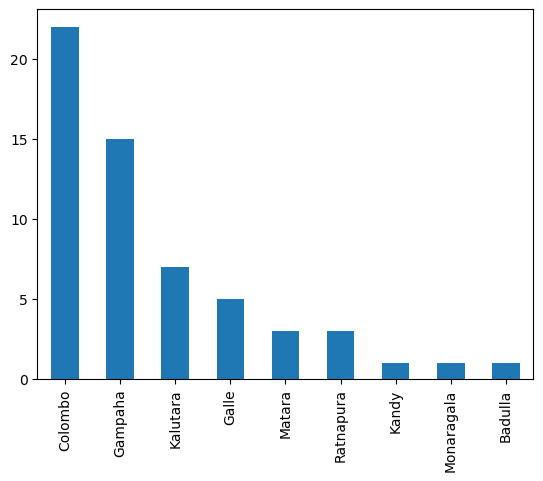

In [25]:
df['District'].value_counts().plot(kind='bar')

<AxesSubplot:>

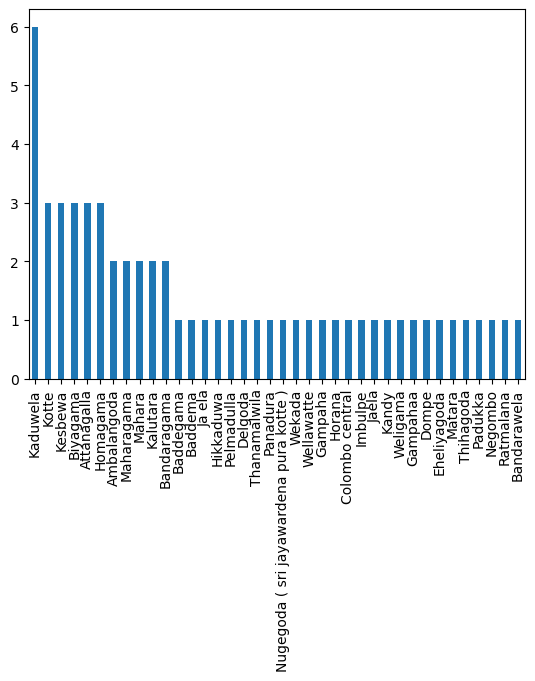

In [26]:
df['Secretarial Division'].value_counts().plot(kind='bar')